# **Feature Engineering Notebook**

## Objectives

*  Evaluate which transformations are beneficial for our dataset

## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv

## Outputs

* Generate a list of engineering approaches for each variable


---

In [1]:
# Ignore FutureWarnings
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# Change working directory

We need to change the working directory from its current folder, where the notebook is stored, to its parent folder
* First we access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\kathr\\Nextcloud\\Dokumente\\Karriere\\Projekte\\vscode-projects\\PP5\\LoanGuard\\jupyter_notebooks'

* Then we want to make the parent of the current directory the new current directory
    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")

You set a new current directory: c:\Users\kathr\Nextcloud\Dokumente\Karriere\Projekte\vscode-projects\PP5\LoanGuard


---

# Load Cleaned Data

Train Set

In [47]:
import pandas as pd
file_path = "outputs/datasets/cleaned"

TrainSet = pd.read_csv(f"{file_path}/TrainSet.csv")
TrainSet.head(3)
TrainSet.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Test Set

In [48]:
TestSet = pd.read_csv(f"{file_path}/TestSet.csv")
TestSet.head(3)

person_age  person_income person_home_ownership  person_emp_length  \
0          31          50000              MORTGAGE                8.0   
1          26          85000                  RENT                2.0   
2          26          62004                  RENT                9.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0  DEBTCONSOLIDATION          C       6000          13.49            0   
1            VENTURE          A      28000           7.49            1   
2  DEBTCONSOLIDATION          A      24000           7.90            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.12                         Y                           9  
1                 0.33                         N                           3  
2                 0.39                         N                           3

# Data Exploration

To identify potential transformations, we first revisit the Profile Report generated earlier.
This allows us to assess:

* The distributions of numerical variables (to detect skewness or outliers)
* The cardinality and balance of categorical variables
* Possible data scaling needs due to large differences in magnitude

Based on these insights, we will determine which variables may benefit from transformations such as scaling, normalization or encoding before modeling.

In [50]:
from ydata_profiling import ProfileReport
    
# Convert object columns to categorical so that it can be displayed properly in the report
TrainSet_cat = TrainSet.copy()
for col in TrainSet_cat.select_dtypes(include='object').columns:
    TrainSet_cat[col] = TrainSet_cat[col].astype('category')
    
pandas_report = ProfileReport(df=TrainSet_cat, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The ProfileReport suggests different transformations depending on the variable type and distribution.

Categorical variables should be handled differently based on whether they are nominal or ordinal. The numerical variables are mostly skewed, so numerical transformations may help improve model performance. Additionally, correlated features should be identified for possible removal to reduce redundancy. Finally, variables should be scaled to ensure comparable ranges, which benefits many machine learning algorithms. 

Transformation Steps:
1. Categorical variables
    * Nominal Variables: OrdinalEncoder (arbitrary)
        * `person_home_ownership`, `loan_intent`, `cb_person_default_on_file`
    * Ordinal Variables: OrdinalEncoder (ordered)
        * `loan_grade`
2. Numerical Variables
    * All other numerical variables: Numerical transformation, since they do not have a normal distribution 
3. All Variables: Smart correlated selection, so any correlated features will be removed
4. Scaling variables

---

# Feature Engineering

In [83]:
target_var = "loan_status"

In [ ]:
import scipy.stats as stats
# for vs code
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

## Categorical Variables

### Nominal Variables: OrdinalEncoder (arbitrary)

* Step 1: Select variables and create a separate DataFrame

In [62]:
variables_engineering= TrainSet.select_dtypes(include='object').columns.drop("loan_grade").tolist()
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

person_home_ownership loan_intent cb_person_default_on_file
0                  RENT   EDUCATION                         N
1                  RENT   EDUCATION                         N
2                  RENT     VENTURE                         N

* Step 2: Create engineered variables by applying the encoder

The category "Other" of ``person_home_ownership`` has no observations in the training set. By setting `unseen='encode'` in the OrdinalEncoder, any unseen or empty categories are assigned a numeric code during transformation, ensuring the pipeline works without errors and maintains consistency between the train and test sets.

Because the variable already has a small, well-defined set of categories, we avoid merging it with one of the other categories and rely on the encoder to handle unseen categories safely.

In [76]:
encoder = OrdinalEncoder(
    encoding_method='arbitrary', 
    variables=variables_engineering,
    unseen='encode')  # safely handles unseen categories
df_feat_eng = encoder.fit_transform(df_engineering)
df_feat_eng.head(3)

person_home_ownership  loan_intent  cb_person_default_on_file
0                      0            0                          0
1                      0            0                          0
2                      0            1                          0

* Step 3: Assess transformation by comparing engineered variables distribution to original ones

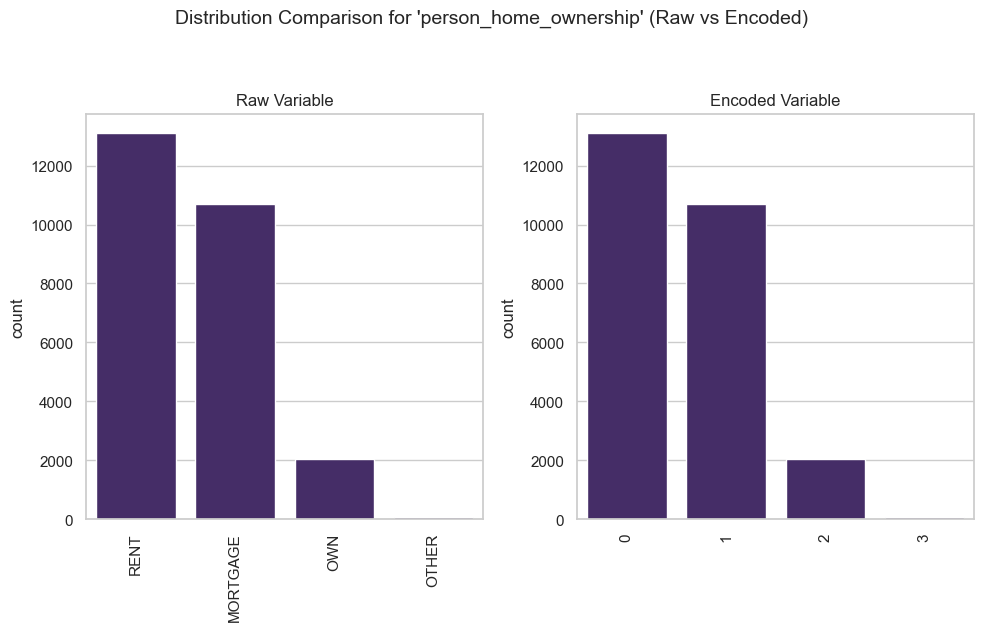

---


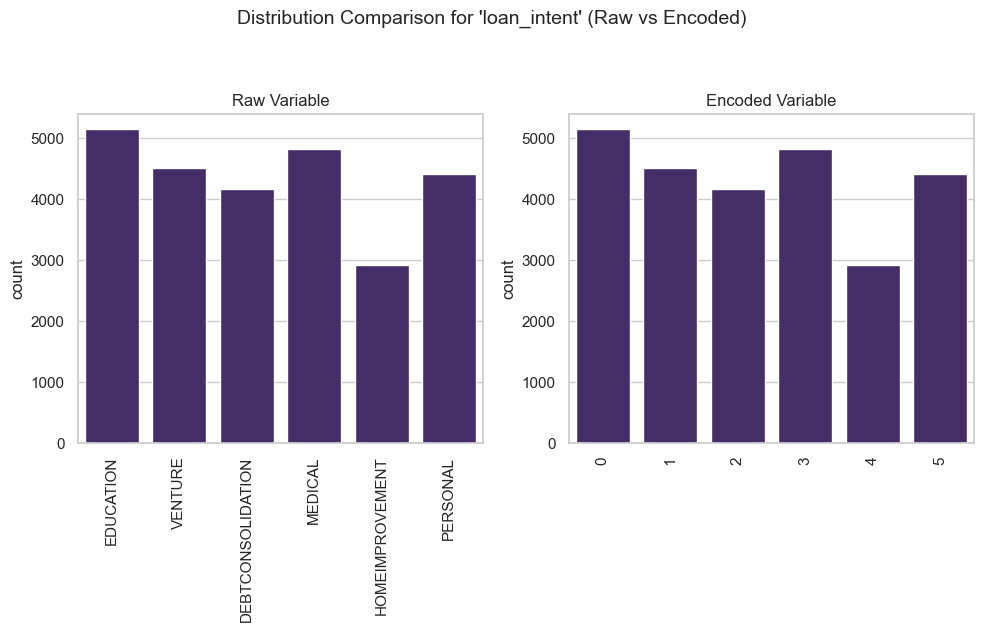

---


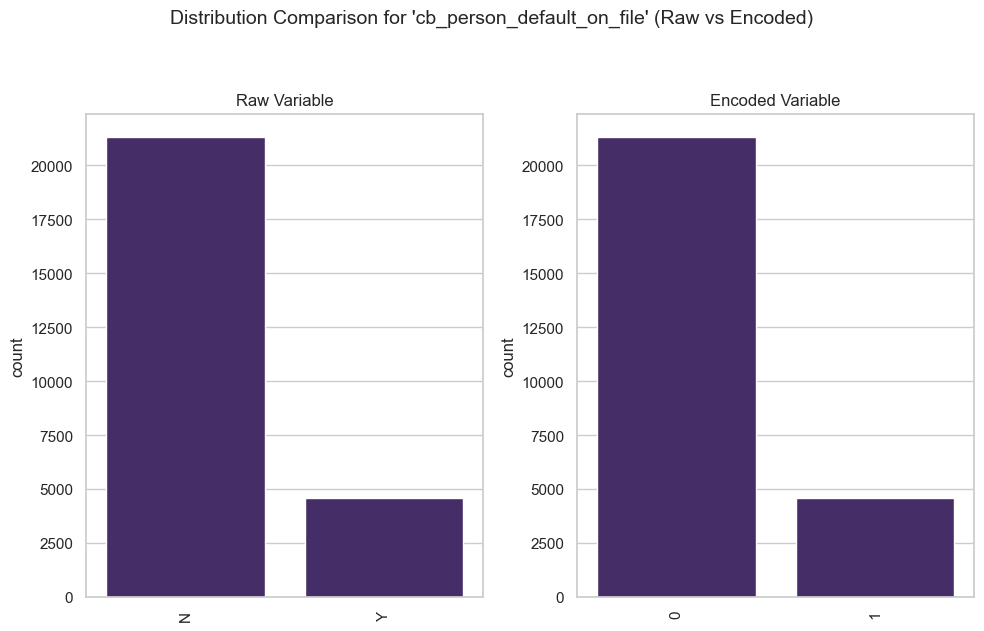

---


In [ ]:
for var in variables_engineering:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Create figure with 2 plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(f"Distribution Comparison for '{var}' (Raw vs Encoded)", fontsize=14, y=1.05)

    # Raw variable countplot
    sns.countplot(data=df_engineering, x=var, color="#432371", ax=axes[0])
    axes[0].set_title("Raw Variable")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis="x", rotation=90)

    # Encoded variable bar plot
    sns.countplot(data=df_feat_eng, x=var, color="#432371", ax=axes[1])
    axes[1].set_title("Encoded Variable")
    axes[1].set_xlabel("")
    axes[1].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()


* For nominal categorical variables, the OrdinalEncoder successfully transformed each category into a numeric code. Therefore, this transformation will be applied in the pipeline

* Step 4 - Apply the selected transformation to the Train and Test set

In [78]:
encoder = OrdinalEncoder(
    encoding_method='arbitrary', 
    variables=variables_engineering,
    unseen='encode')
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.fit_transform(TestSet)

In [79]:
TrainSet.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0          25          35364                      0                0.0   
1          22          60000                      0                3.0   
2          26          45600                      0                5.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0          A      10000           9.32            0   
1            0          A       7000           6.91            0   
2            1          A       2000          10.99            0   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.28                          0                           3  
1                 0.12                          0                           2  
2                 0.04                          0                           3

In [80]:
TestSet.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0          31          50000                      0                8.0   
1          26          85000                      1                2.0   
2          26          62004                      1                9.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0          C       6000          13.49            0   
1            1          A      28000           7.49            1   
2            0          A      24000           7.90            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.12                          0                           9  
1                 0.33                          1                           3  
2                 0.39                          1                           3

### Ordinal Variables: OrdinalEncoder (ordered)

* Step 1: Select variables and create a separate DataFrame

In [84]:
variables_engineering= ["loan_grade", target_var]
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

loan_grade  loan_status
0          A            0
1          A            0
2          A            0

* Step 2: Create engineered variables by applying the encoder

Although all categories within this feature have some observations in the training set, category "G" only has very few observations. So we still set `unseen='encode'` to safely handle any rare or unseen categories and ensure consistent encoding across train and test sets.

In [ ]:
encoder = OrdinalEncoder(encoding_method='ordered', variables="loan_grade", unseen='encode')
df_feat_eng = encoder.fit_transform(pd.DataFrame(df_engineering["loan_grade"]), pd.DataFrame(df_engineering[target_var]))
df_feat_eng.head(3)


loan_grade
0           0
1           0
2           0

* Step 3: Assess transformation by comparing engineered variables distribution to original ones

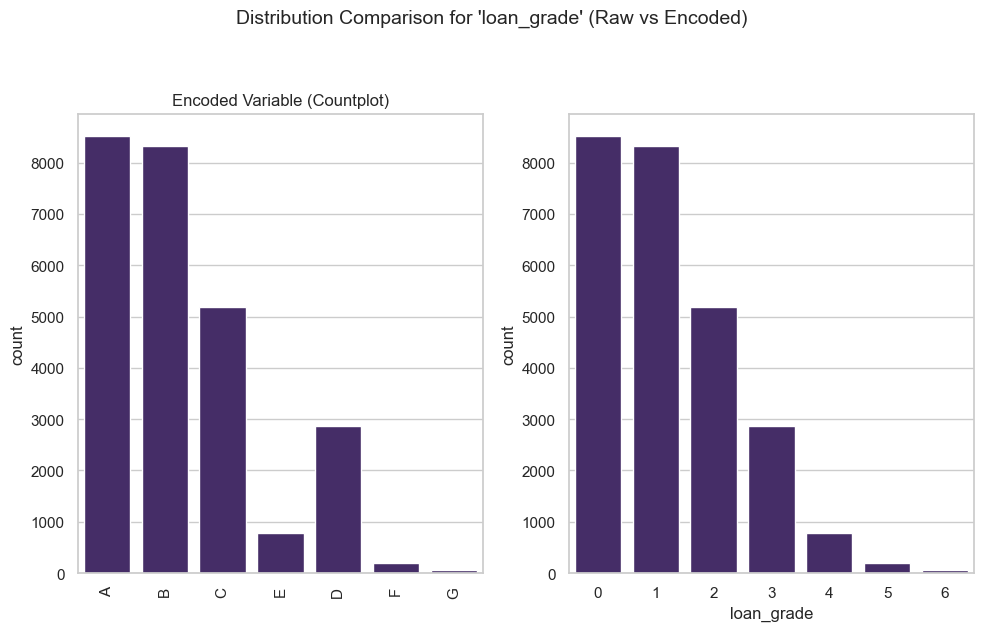

Count Table (Raw Variable):


loan_grade  Count
0          A   8528
1          B   8326
2          C   5182
3          D   2857
4          E    790
5          F    191
6          G     58


Count Table (Encoded Variables):


loan_grade  Count
0           0   8528
1           1   8326
2           2   5182
3           3   2857
4           4    790
5           5    191
6           6     58

Class Mapping:
{'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}}
---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

var = variables_engineering[0]
# Count tables
raw_counts = df_engineering[var].value_counts().reset_index()
raw_counts.columns = [var, "Count"]

encoded_counts = df_feat_eng[var].value_counts().reset_index()
encoded_counts.columns = [var, "Count"]

# Create figure with 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(f"Distribution Comparison for '{var}' (Raw vs Encoded)", fontsize=14, y=1.05)

# Raw variable countplot
sns.countplot(data=df_engineering, x=var, color="#432371", ax=axes[0])
axes[0].set_title("Raw Variable (Countplot)")
axes[0].set_xlabel("")
axes[0].tick_params(axis="x", rotation=90)

# Encoded variable bar plot
sns.countplot(data=df_feat_eng, x=var, color="#432371", ax=axes[1])
axes[0].set_title("Encoded Variable (Countplot)")
axes[0].set_xlabel("")
axes[0].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

* The OrdinalEncoder successfully transformed the ordered categorical variables into numeric form while preserving their order. Therefore, this transformation will be applied in the pipeline

* Step 4 - Apply the selected transformation to the Train and Test set

In [88]:
encoder = OrdinalEncoder(encoding_method='ordered', variables="loan_grade", unseen='encode')
TrainSet["loan_grade"] = encoder.fit_transform(pd.DataFrame(TrainSet["loan_grade"]), pd.DataFrame(TrainSet[target_var]))
TestSet["loan_grade"] = encoder.transform(pd.DataFrame(TestSet["loan_grade"]))

In [89]:
TestSet.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0          31          50000                      0                8.0   
1          26          85000                      1                2.0   
2          26          62004                      1                9.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0           2       6000          13.49            0   
1            1           0      28000           7.49            1   
2            0           0      24000           7.90            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.12                          0                           9  
1                 0.33                          1                           3  
2                 0.39                          1                           3

In [90]:
TrainSet.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0          25          35364                      0                0.0   
1          22          60000                      0                3.0   
2          26          45600                      0                5.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0           0      10000           9.32            0   
1            0           0       7000           6.91            0   
2            1           0       2000          10.99            0   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.28                          0                           3  
1                 0.12                          0                           2  
2                 0.04                          0                           3

## Numerical Variables

### Custom function

The following function gets a DataFrame as input and applies a defined set of numerical
feature engineering transformers. This will help to decide which transformers to apply to the data.


In [ ]:
# TODO FUNKTION VEREINFACHEN??

import scipy.stats as stats
# for vs code
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):

    df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
        df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    sns.histplot(data=df, x=variable, kde=True, ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()

def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


### Numerical Transformations

* Step 1: Select variables and create a separate DataFrame

In [94]:
variables_engineering= TrainSet_cat.select_dtypes(include=['int64', 'float64']).columns.drop(target_var).tolist()
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          25          35364                0.0      10000           9.32   
1          22          60000                3.0       7000           6.91   
2          26          45600                5.0       2000          10.99   

   loan_percent_income  cb_person_cred_hist_length  
0                 0.28                           3  
1                 0.12                           2  
2                 0.04                           3

* Step 2: Create engineered variables by applying the encoder and assess transformation by comparing engineered variables distributions to original ones

* Variable Analyzed: person_age
* Applied transformation: ['person_age_log_e', 'person_age_log_10', 'person_age_reciprocal', 'person_age_power', 'person_age_box_cox', 'person_age_yeo_johnson'] 



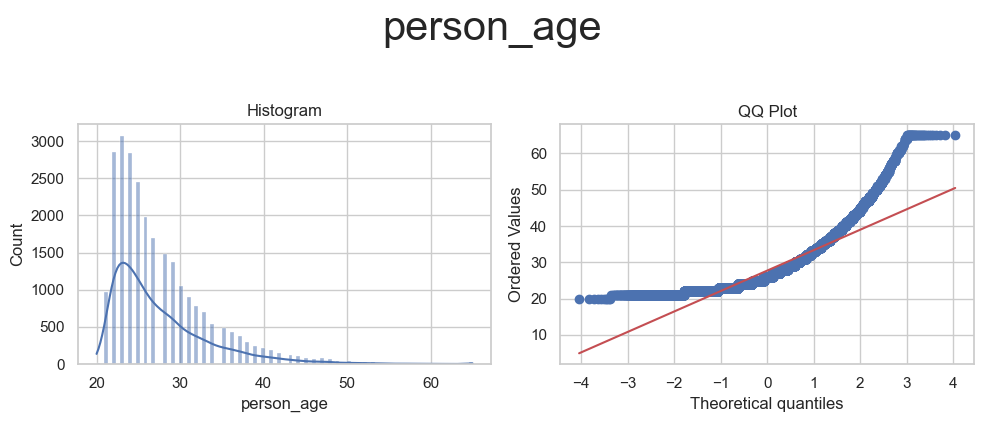

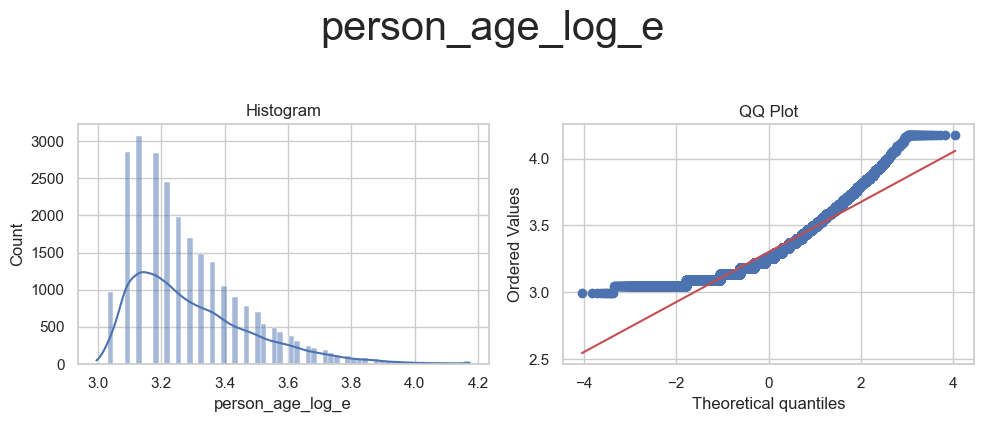

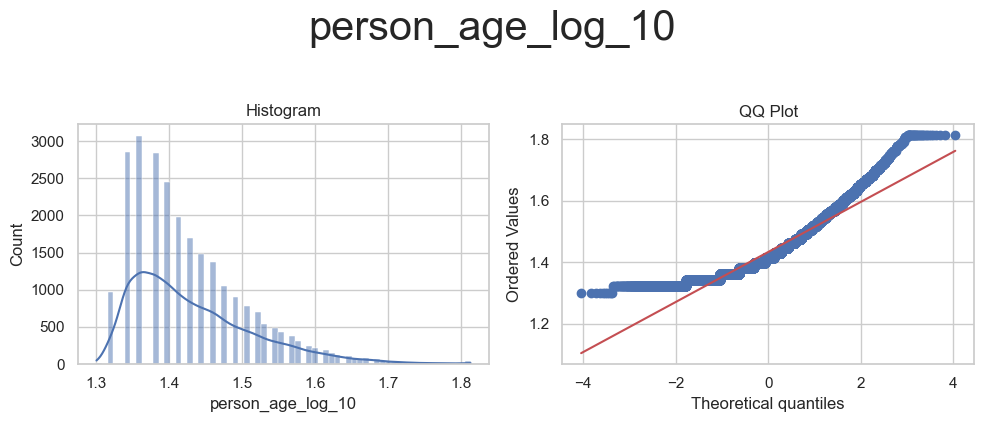

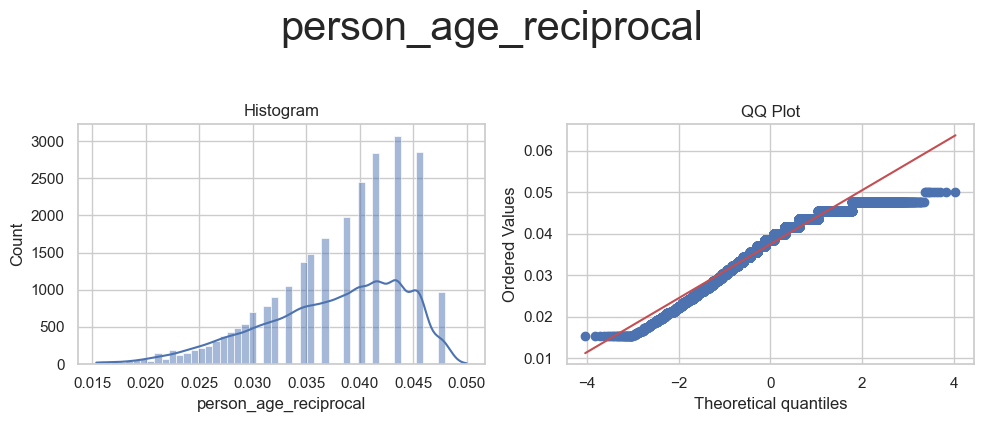

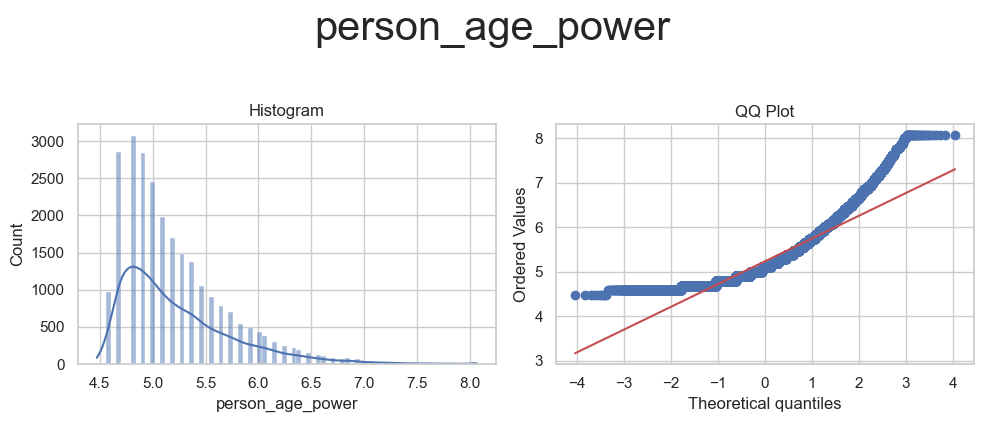

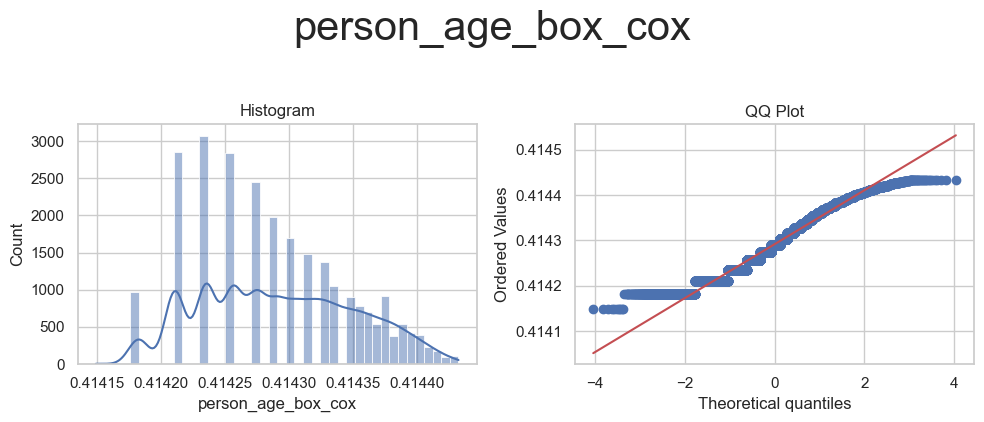

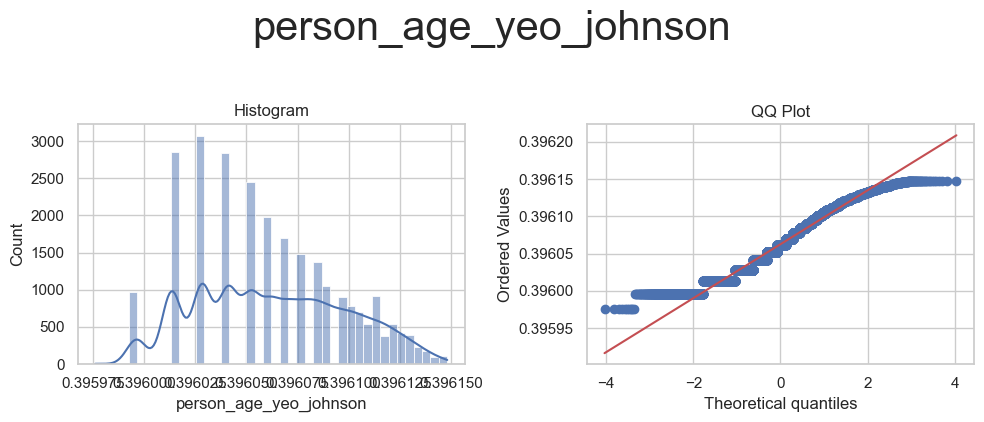



* Variable Analyzed: person_income
* Applied transformation: ['person_income_log_e', 'person_income_log_10', 'person_income_reciprocal', 'person_income_power', 'person_income_box_cox', 'person_income_yeo_johnson'] 



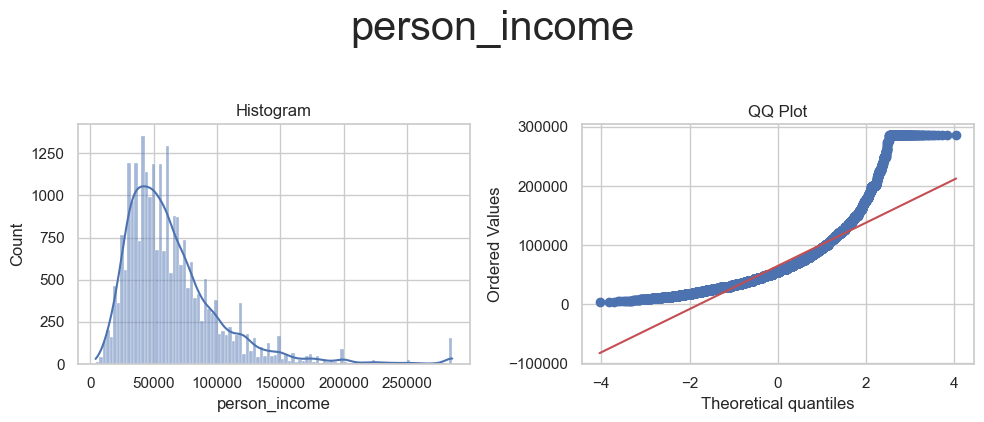

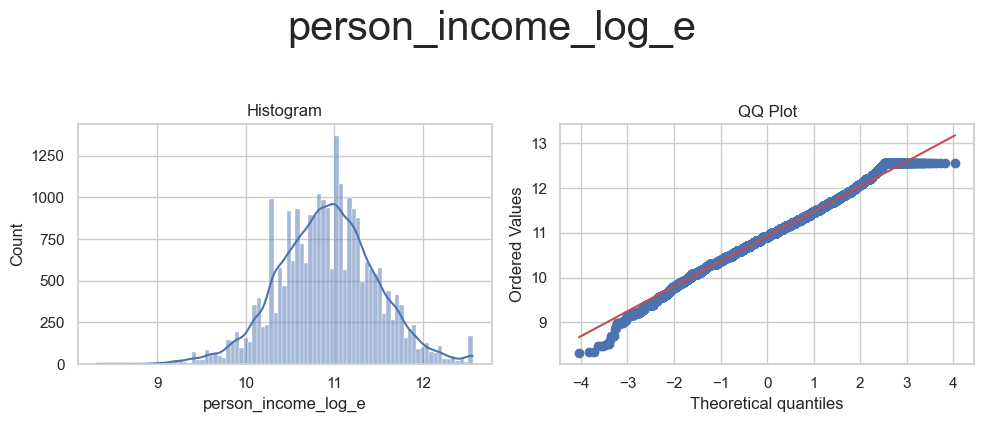

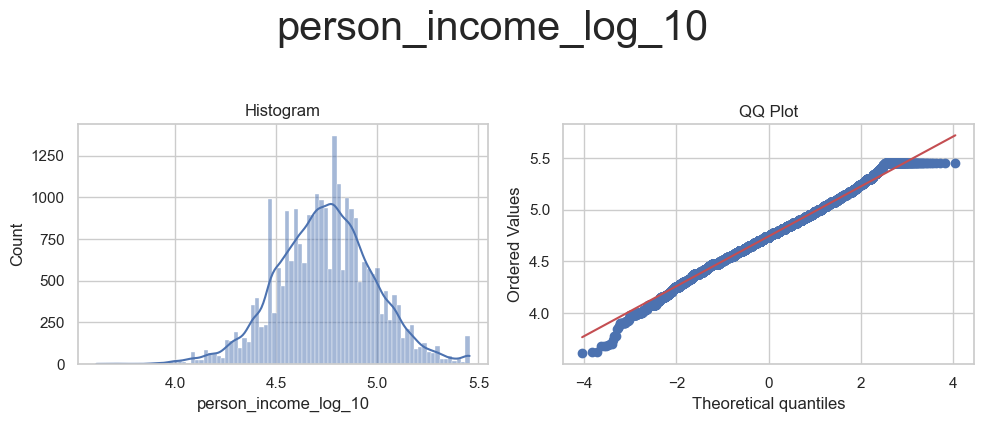

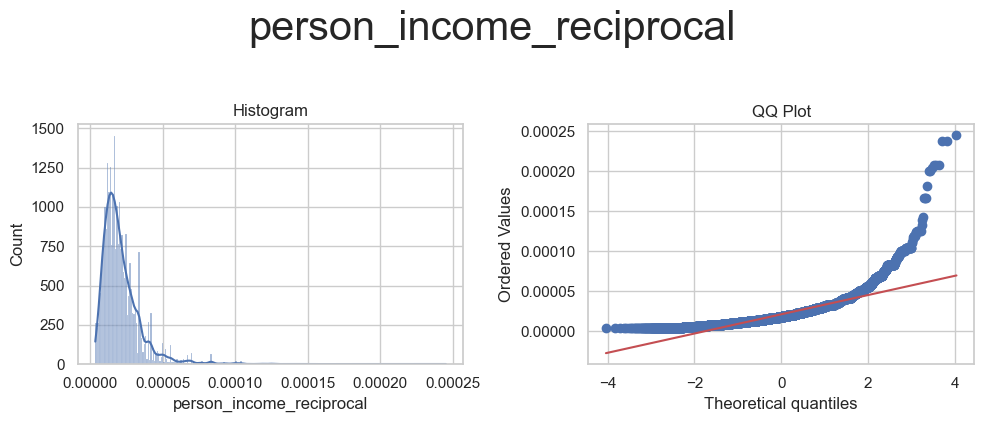

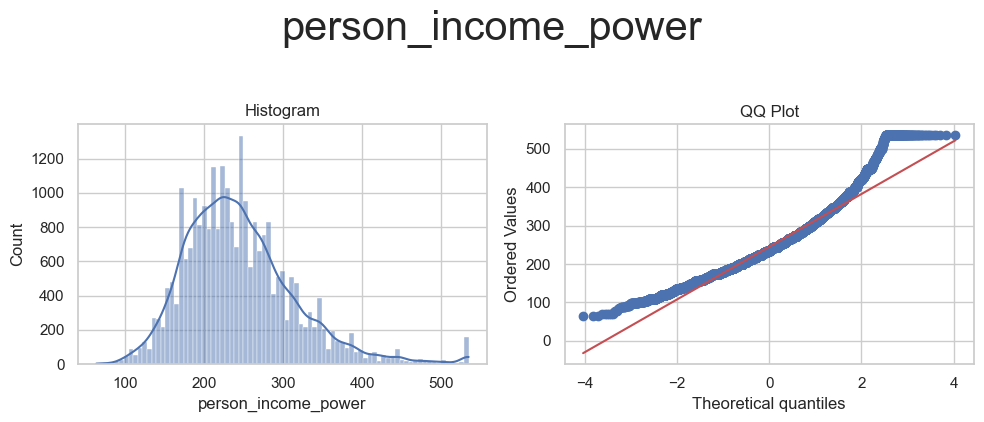

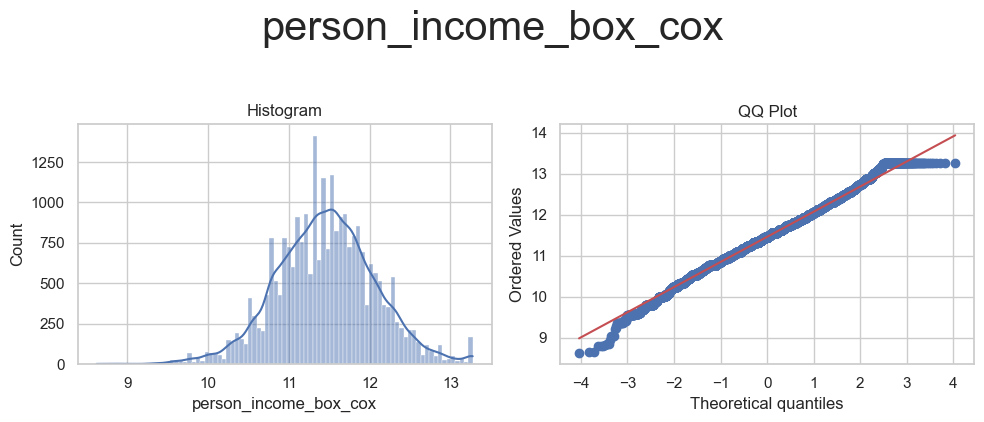

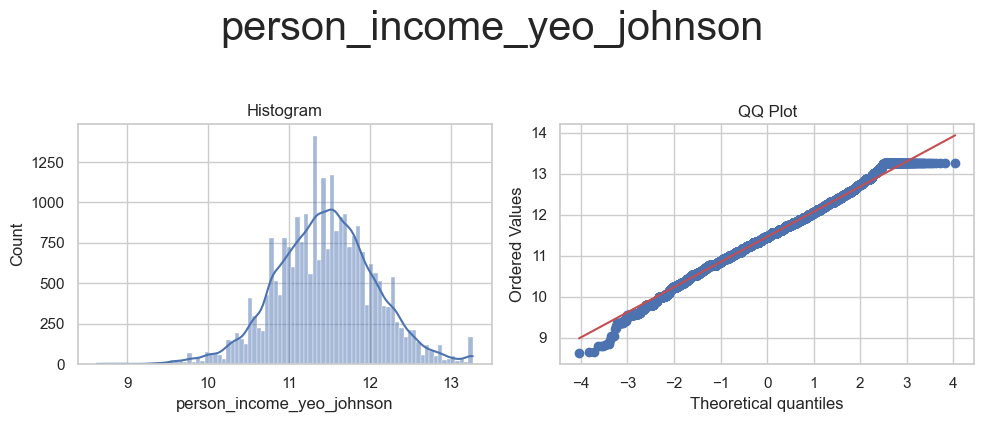



* Variable Analyzed: person_emp_length
* Applied transformation: ['person_emp_length_power', 'person_emp_length_yeo_johnson'] 



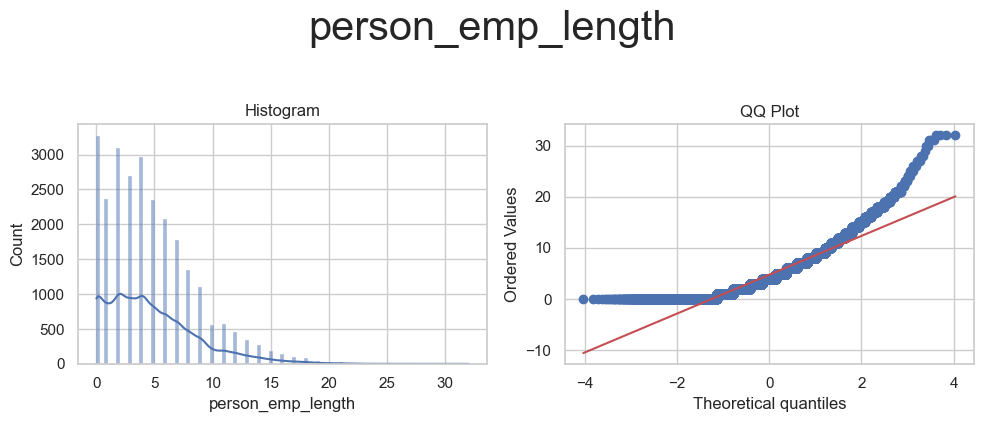

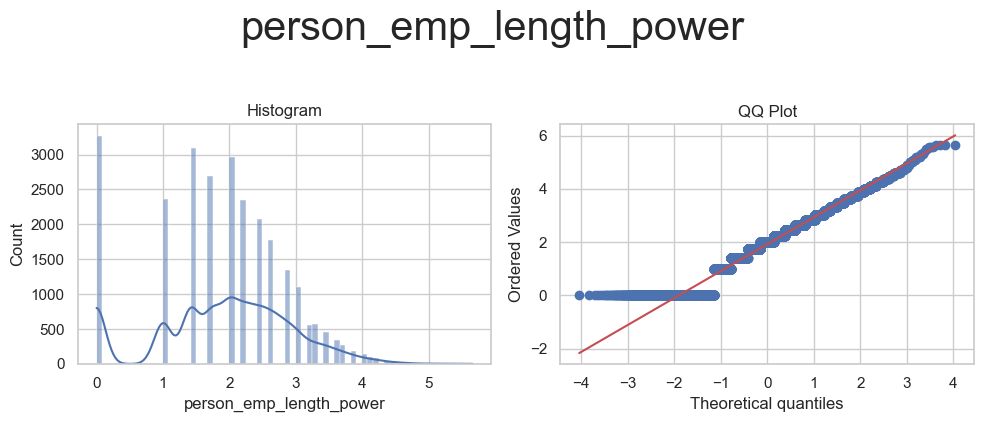

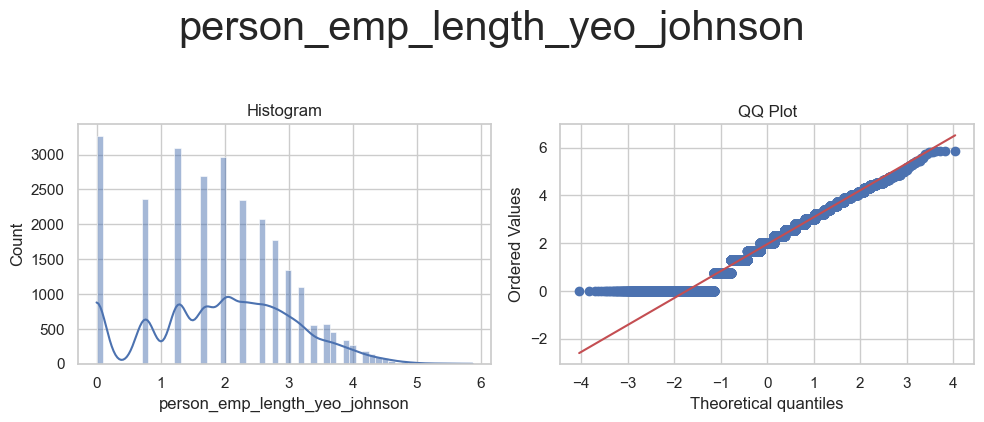



* Variable Analyzed: loan_amnt
* Applied transformation: ['loan_amnt_log_e', 'loan_amnt_log_10', 'loan_amnt_reciprocal', 'loan_amnt_power', 'loan_amnt_box_cox', 'loan_amnt_yeo_johnson'] 



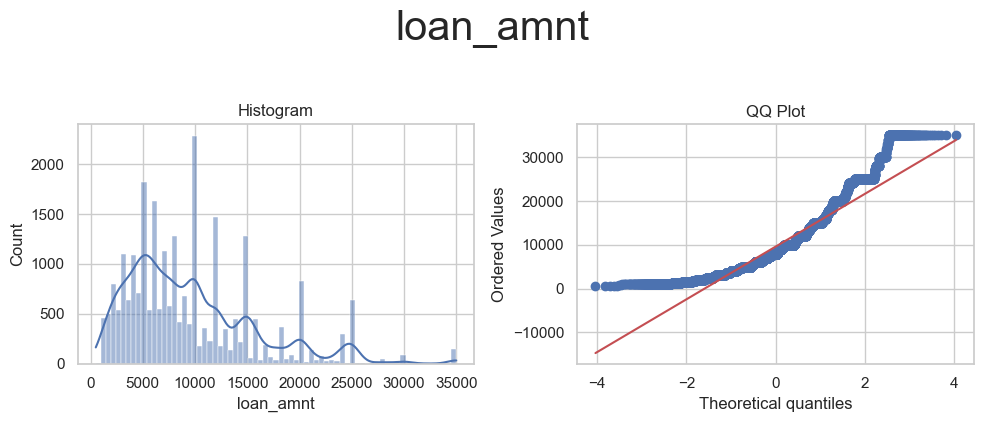

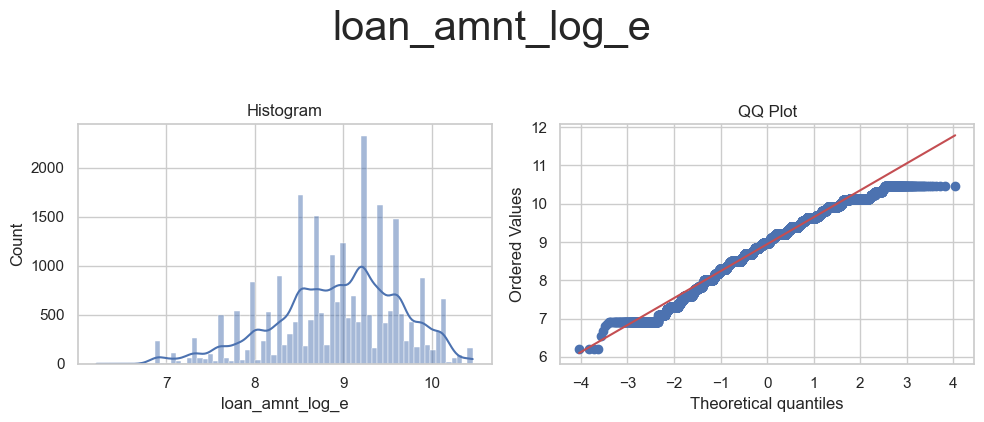

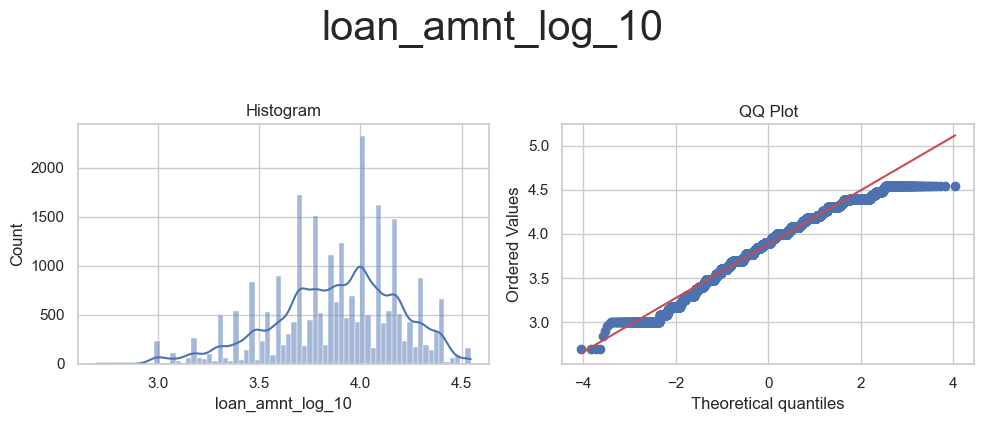

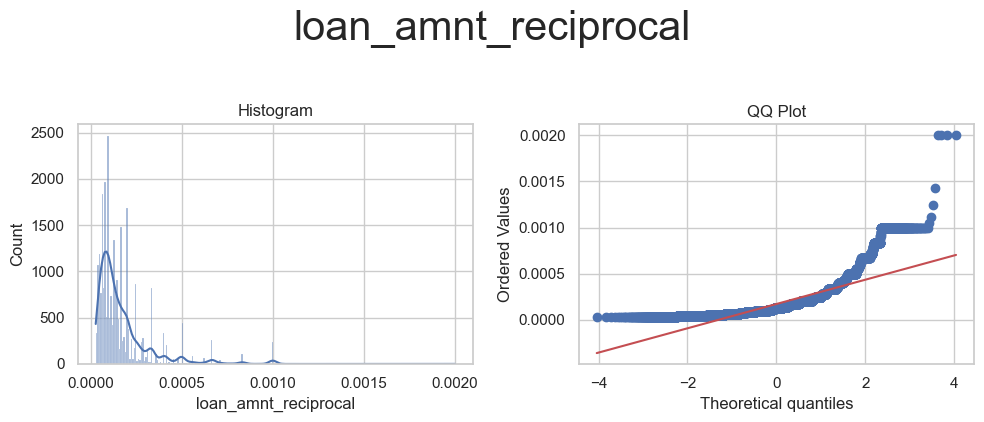

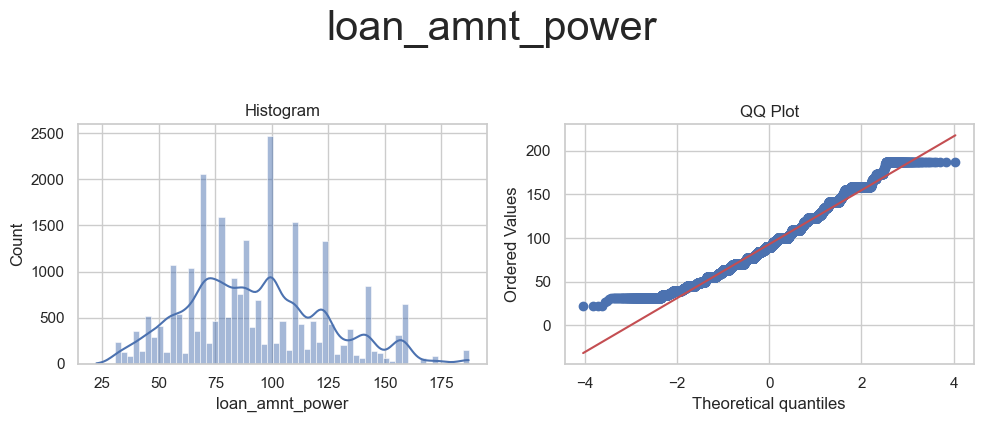

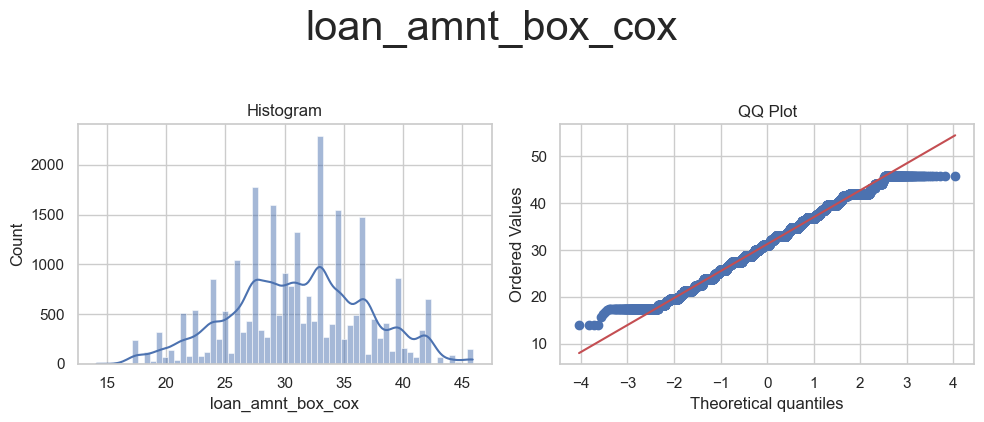

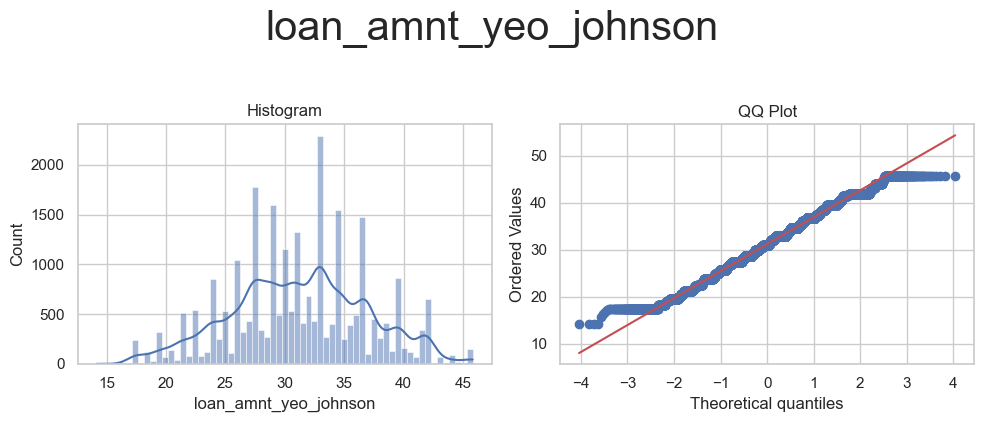



* Variable Analyzed: loan_int_rate
* Applied transformation: ['loan_int_rate_log_e', 'loan_int_rate_log_10', 'loan_int_rate_reciprocal', 'loan_int_rate_power', 'loan_int_rate_box_cox', 'loan_int_rate_yeo_johnson'] 



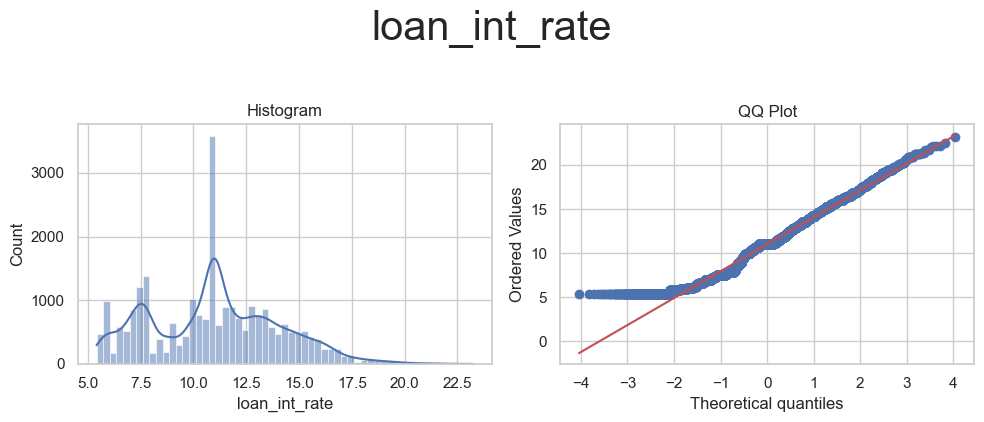

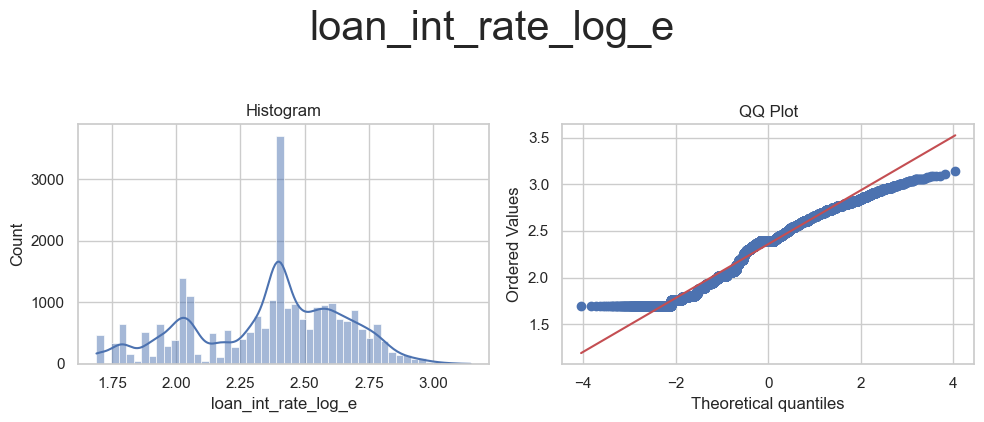

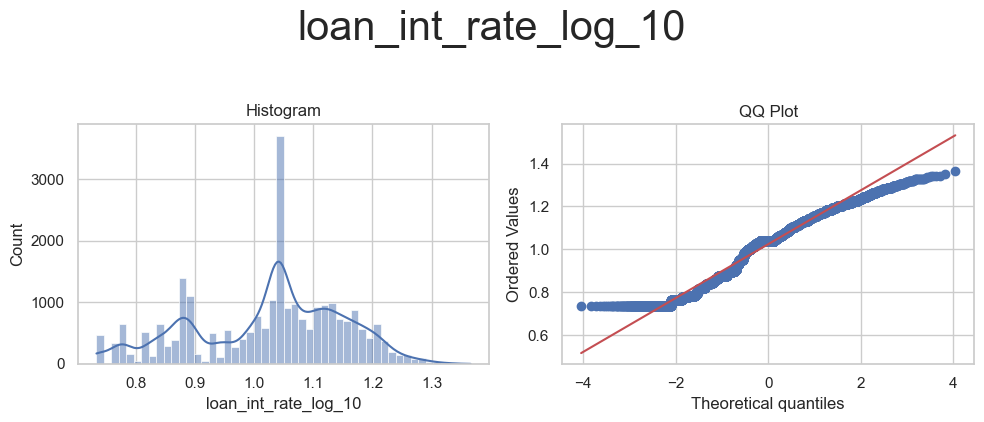

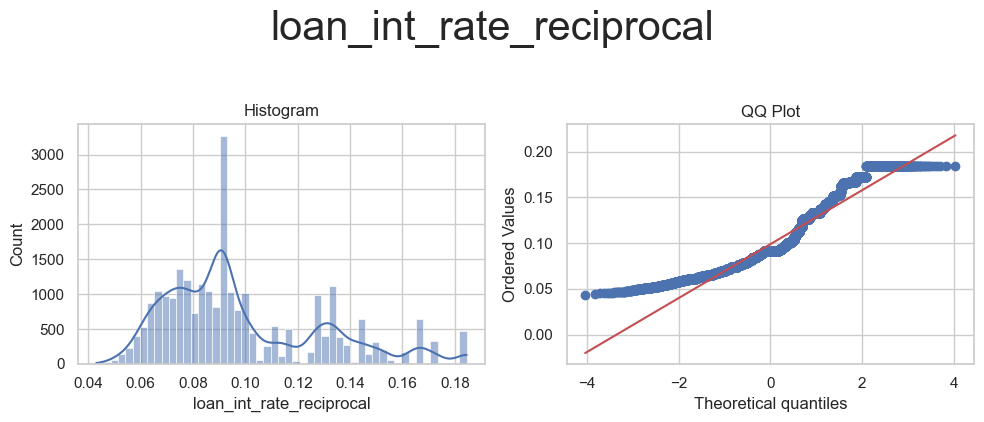

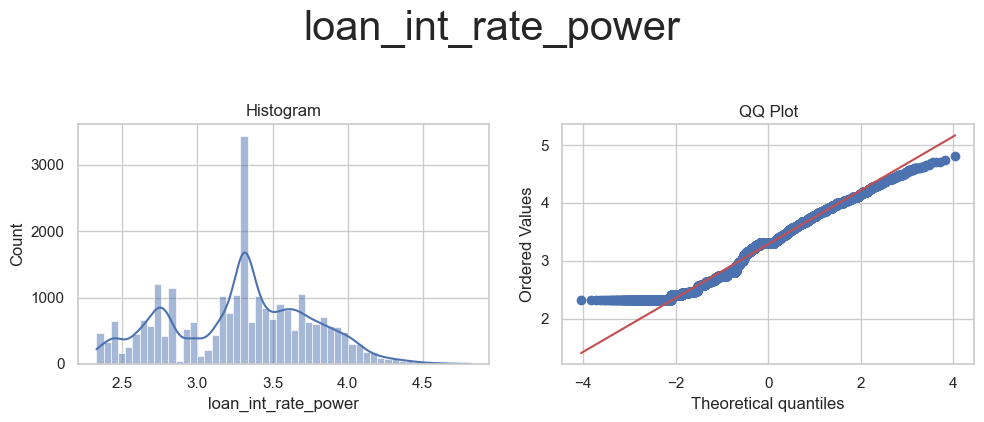

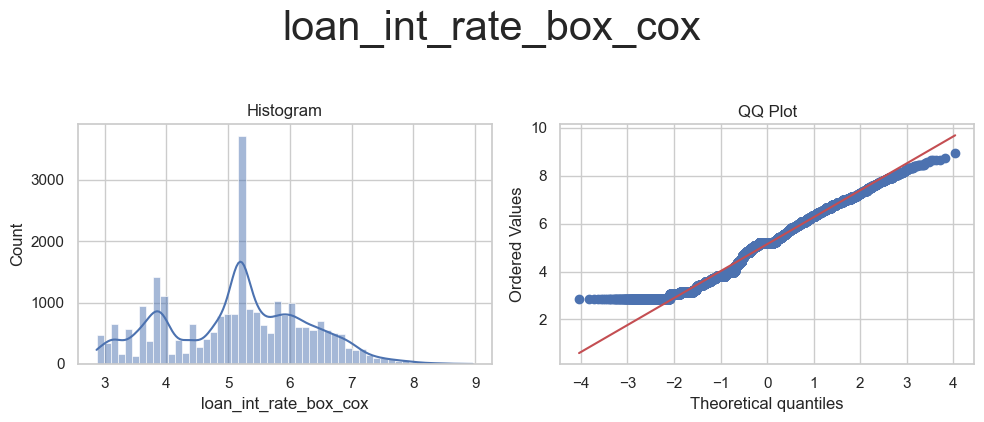

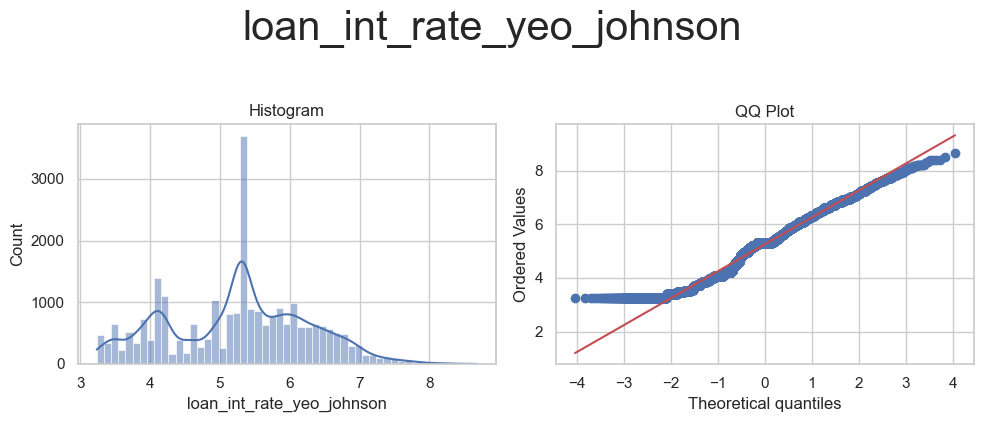



* Variable Analyzed: loan_percent_income
* Applied transformation: ['loan_percent_income_power', 'loan_percent_income_yeo_johnson'] 



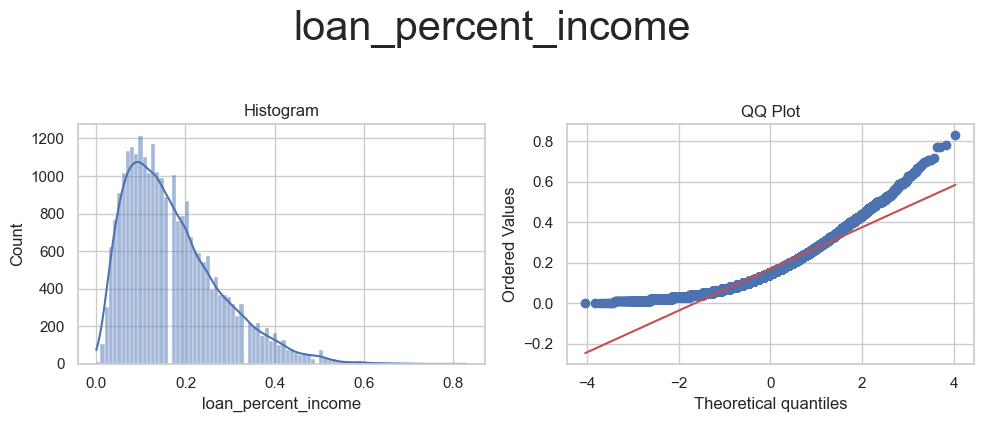

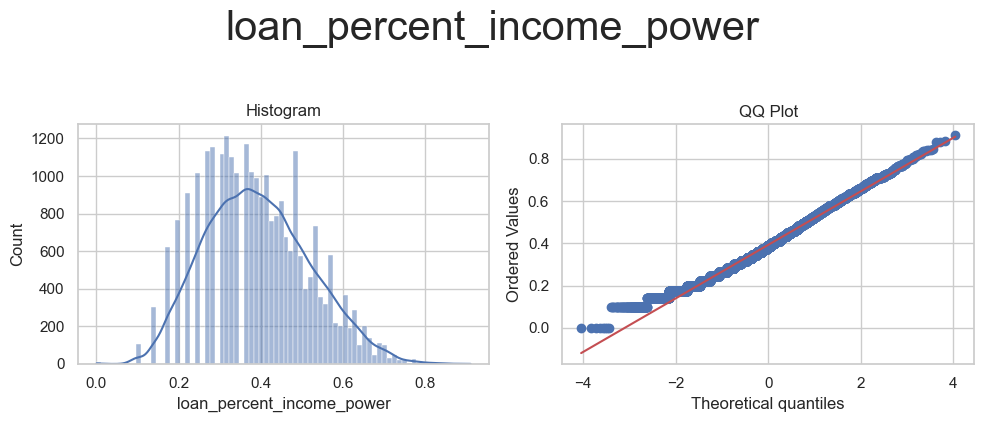

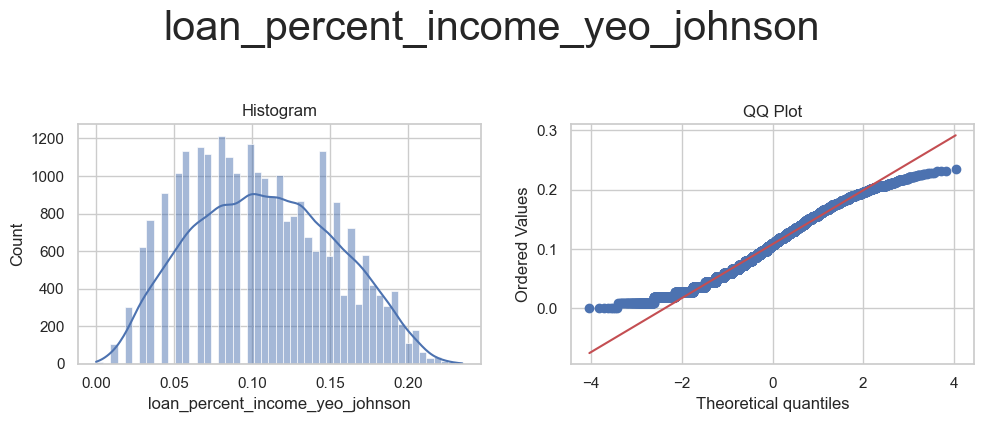



* Variable Analyzed: cb_person_cred_hist_length
* Applied transformation: ['cb_person_cred_hist_length_log_e', 'cb_person_cred_hist_length_log_10', 'cb_person_cred_hist_length_reciprocal', 'cb_person_cred_hist_length_power', 'cb_person_cred_hist_length_box_cox', 'cb_person_cred_hist_length_yeo_johnson'] 



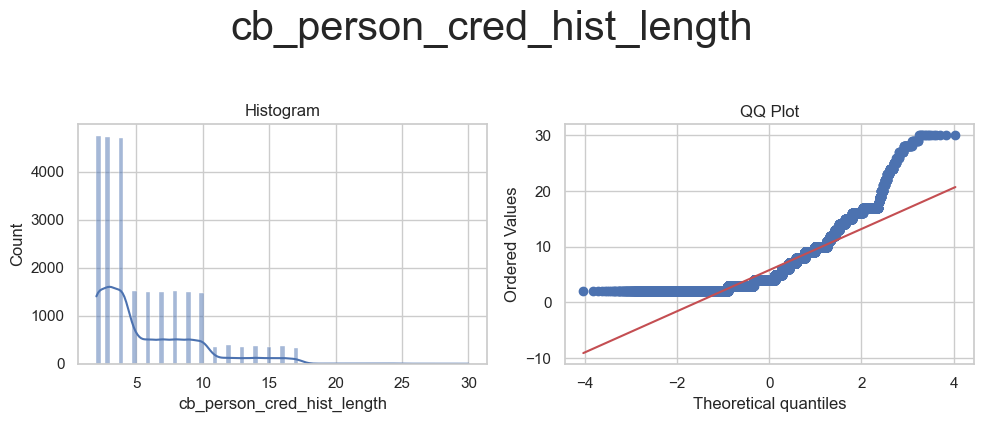

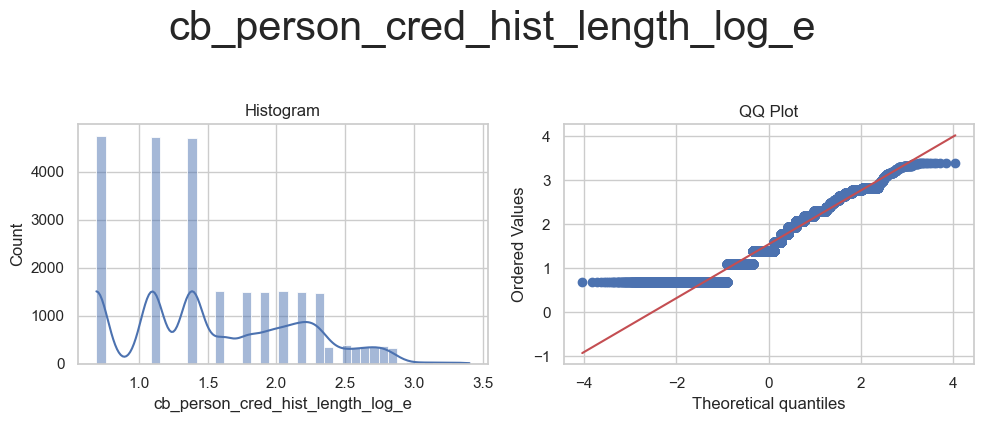

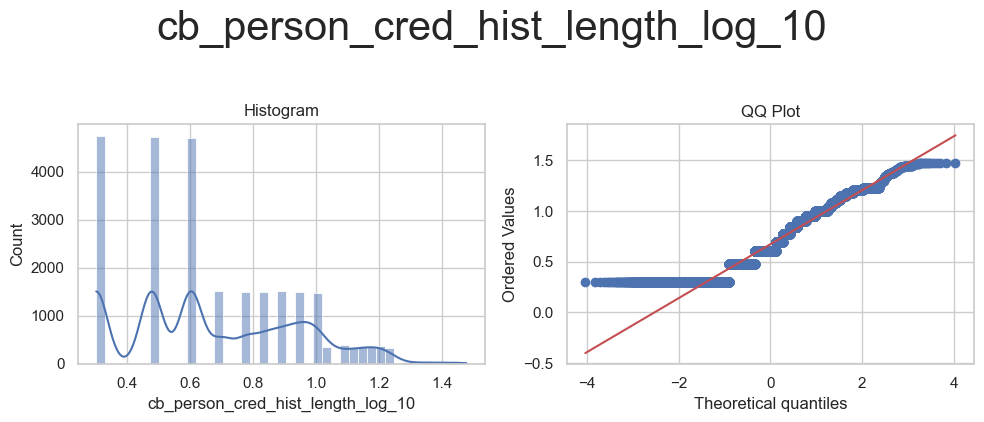

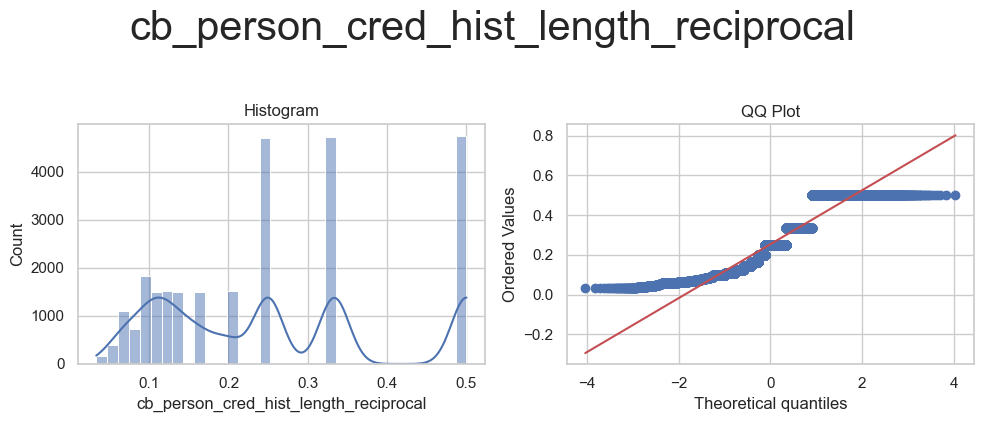

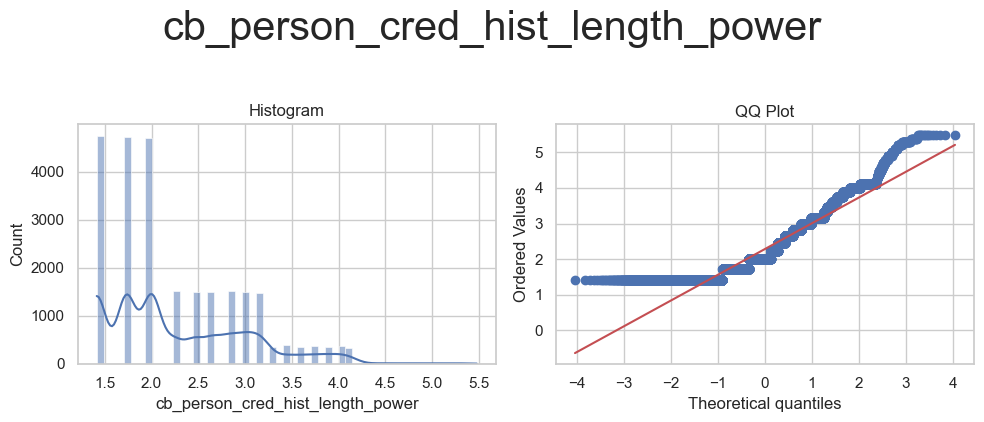

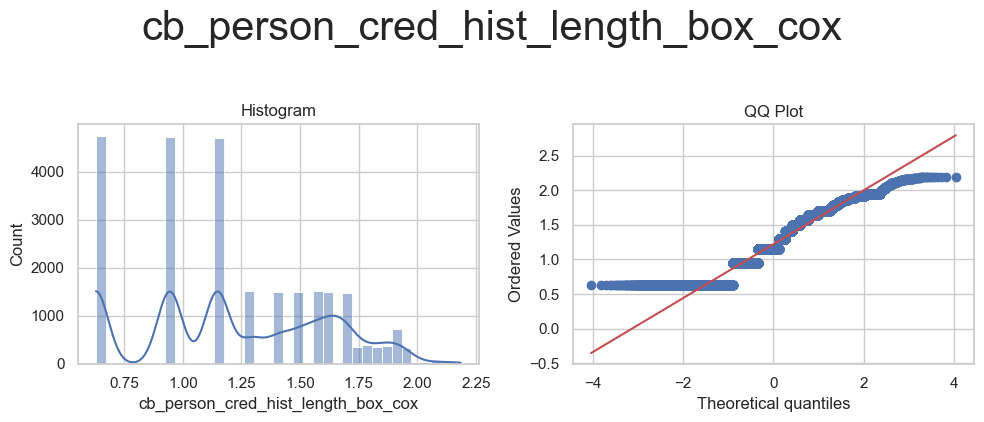

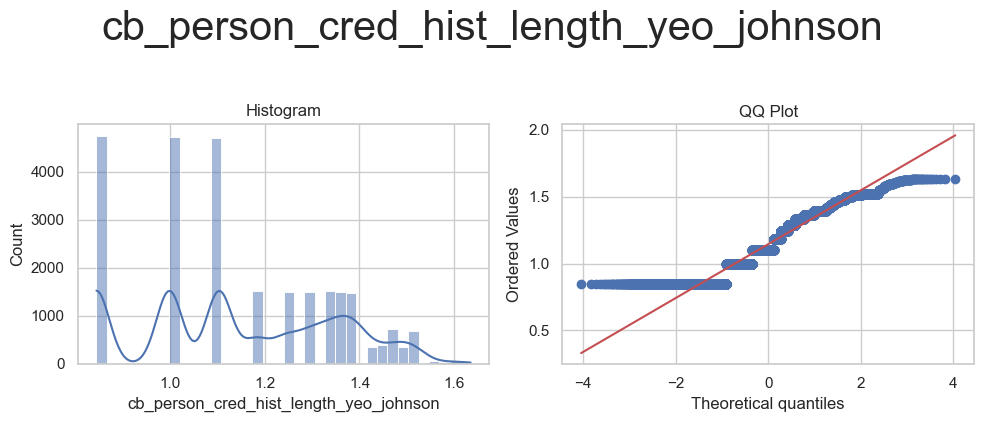

In [95]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

* Several numerical transformations were tested, including Log (base e), Log10, Reciprocal, Power, Box-Cox, and Yeo-Johnson 
* For most variables, transformations helped to make the distributions closer to normal. The chosen transformations, based on QQ plots showing values closest to the diagonal, are:
    - Log (base e): `person_age`, `person_income`, `cb_person_cred_hist_length`  
    - Power: `person_emp_length`, `loan_amnt`, `loan_percent_income`  
    - None: `loan_int_rate`  
* These transformations will be applied in the pipeline to improve feature distributions for modeling, particularly for algorithms sensitive to variable scaling and distribution shape

Apply the selected transformation to the Train and Test set:

In [97]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('log_transform', vt.LogTransformer(variables=['person_age', 'person_income', 'cb_person_cred_hist_length'])),
    ('power_transform', vt.PowerTransformer(variables=['person_emp_length', 'loan_amnt', 'loan_percent_income']))
])

TrainSet = num_pipeline.fit_transform(TrainSet)
TestSet = num_pipeline.transform(TestSet)

In [98]:
TrainSet.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0    3.218876      10.473450                      0           0.000000   
1    3.091042      11.002100                      0           1.732051   
2    3.258097      10.727663                      0           2.236068   

   loan_intent  loan_grade   loan_amnt  loan_int_rate  loan_status  \
0            0           0  100.000000           9.32            0   
1            0           0   83.666003           6.91            0   
2            1           0   44.721360          10.99            0   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0              0.52915                          0                    1.098612  
1              0.34641                          0                    0.693147  
2              0.20000                          0                    1.098612

### SmartCorrelatedSelection Variables

Here we're looking for groups of features that correlate amongst themselves,
we want to remove any surplus correlated features since they’ll add the same information to the model.
The transformer takes care of finding the groups and drops the features based on the method,
threshold and selection method that we decided. This means for every group of correlated features,
the transformer will remove all but one feature.

* Step 1: Create a separate DataFrame

In [100]:
df_engineering = TrainSet.copy()
df_engineering.head(3)

person_age  person_income  person_home_ownership  person_emp_length  \
0    3.218876      10.473450                      0           0.000000   
1    3.091042      11.002100                      0           1.732051   
2    3.258097      10.727663                      0           2.236068   

   loan_intent  loan_grade   loan_amnt  loan_int_rate  loan_status  \
0            0           0  100.000000           9.32            0   
1            0           0   83.666003           6.91            0   
2            1           0   44.721360          10.99            0   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0              0.52915                          0                    1.098612  
1              0.34641                          0                    0.693147  
2              0.20000                          0                    1.098612

Confirm that all data types are numerical

In [101]:
df_engineering.dtypes

person_age                    float64
person_income                 float64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                     float64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length    float64
dtype: object

* Step 2: Create engineered variables applying the transformations

In [106]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'cb_person_cred_hist_length', 'person_age'},
 {'loan_grade', 'loan_int_rate'},
 {'loan_amnt', 'loan_percent_income'}]

In [107]:
corr_sel.features_to_drop_

['person_age', 'loan_grade', 'loan_percent_income']

* After applying the `SmartCorrelatedSelection`, meaningful correlations were found between the following variable pairs:
    - `cb_person_cred_hist_length` & `person_age`  
    - `loan_grade` & `loan_int_rate`  
    - `loan_amnt` & `loan_percent_income`  

* From each pair, one variable will be dropped to avoid multicollinearity. These correlations were also visible in the PPS heatmap during the exploratory data analysis  
* No other features were flagged for removal, confirming that overall multicollinearity is limited. Therefore, we will include the `SmartCorrelatedSelection` step in our pipeline to automatically handle these high correlations during preprocessing

Apply the SmartCorrelatedSelection to the Train and Test set:

In [108]:
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

TrainSet = corr_sel.fit_transform(TrainSet)
TestSet = corr_sel.transform(TestSet)

## Scaling

We apply scaling to the dataset so that all variables are on a comparable range. This is important because many machine learning algorithms are sensitive to the magnitude of features. Without scaling, variables with larger ranges could dominate the learning process, leading to biased or suboptimal models.

Note that after scaling, especially the categorical values are standardized and lose their original interpretability, but this ensures that all numerical inputs contribute comparably to the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

df_engineering = TrainSet.copy()
scaler = StandardScaler()
scaled_array  = scaler.fit_transform(df_engineering)
df_engineering = pd.DataFrame(scaled_array, columns=df_engineering.columns)
df_engineering.head(3)

person_income  person_home_ownership  person_emp_length  loan_intent  \
0      -0.807005              -0.894242          -1.865136    -1.354602   
1       0.139067              -0.894242          -0.185668    -1.354602   
2      -0.352065              -0.894242           0.303048    -0.778041   
3       1.655391               0.649973           1.890268    -0.201480   
4      -1.918804              -0.894242           0.074147     0.375080   

   loan_amnt  loan_int_rate  loan_status  cb_person_default_on_file  \
0   0.227102      -0.550584    -0.532157                  -0.464369   
1  -0.297084      -1.331775    -0.532157                  -0.464369   
2  -1.546883      -0.009261    -0.532157                  -0.464369   
3   0.533401      -1.017354    -0.532157                  -0.464369   
4  -1.083497      -1.017354     1.879146                  -0.464369   

   cb_person_cred_hist_length  
0                   -0.716426  
1                   -1.358024  
2                   -0.716426  
3                    1.021991  
4                   -1.358024

In [111]:
df_engineering.describe().round(2).T

count  mean  std   min   25%   50%   75%   max
person_income               25932.0  -0.0  1.0 -4.67 -0.65 -0.02  0.65  2.93
person_home_ownership       25932.0   0.0  1.0 -0.89 -0.89 -0.89  0.65  3.74
person_emp_length           25932.0  -0.0  1.0 -1.87 -0.49  0.07  0.70  3.62
loan_intent                 25932.0   0.0  1.0 -1.35 -0.78 -0.20  0.95  1.53
loan_amnt                   25932.0   0.0  1.0 -2.26 -0.71 -0.11  0.57  3.02
loan_int_rate               25932.0  -0.0  1.0 -1.81 -0.82 -0.01  0.69  3.96
loan_status                 25932.0  -0.0  1.0 -0.53 -0.53 -0.53 -0.53  1.88
cb_person_default_on_file   25932.0  -0.0  1.0 -0.46 -0.46 -0.46 -0.46  2.15
cb_person_cred_hist_length  25932.0   0.0  1.0 -1.36 -0.72 -0.26  0.84  2.93

Apply StandardScaler to the Train and Test set:

In [112]:
scaler = StandardScaler()

TrainSet = scaler.fit_transform(TrainSet)
TestSet = scaler.transform(TestSet)

---

# Conclusions and Next Steps

Feature Engineering Steps we will apply:
1. Categorical variables
    * Nominal Variables: OrdinalEncoder (arbitrary)  
        - `person_home_ownership`, `loan_intent`, `cb_person_default_on_file`  
    * Ordinal Variables: OrdinalEncoder (ordered)  
        - `loan_grade`
2. Numerical variables   
    - Log (base e): `person_age`, `person_income`, `cb_person_cred_hist_length`  
    - Power: `person_emp_length`, `loan_amnt`, `loan_percent_income`  
    - None: `loan_int_rate` 
3. `SmartCorrelatedSelection` will remove one variable from each highly correlated pair to reduce multicollinearity 
2. Scaling variables

Next Steps:
* Model loan defaults and evaluate model performance

